### Problem 1.
Solve the following problem using the Simplex Search Method:

$$\mbox{min} \hspace{2 mm} f(x) = (1- x_1)^2 + (2 - x_2)^2$$


In [2]:
#Simplex search

#Erin Schmidt

#for non-linear programming problems ala Nelder and Mead(1965)
#**Note** use Python3 for this script
import math as m
import numpy as np

def simplex_search(f, x_start, max_iter = 100, epsilon = 1E-6, gamma = 5, beta = 0.5):
    """
    parameters of the function:
    f is the function to be optimized
    x_start (numpy array): initial position
    epsilon is the termination criteria
    gamma is the contraction coefficient
    beta is the expansion coefficient
    """
    
    #init arrays
    N = len(x_start)
    fnew = []
    xnew = []
    x = []
    
    #generate vertices of initial simplex
    a = .75
    x0 = (x_start)
    x1 = [x0 + [((N + 1)**0.5 + N - 1.)/(N + 1.)*a, 0.]]
    x2 = [x0 + [0., ((N + 1)**0.5 - 1.)/(N + 1.)*a]] 
    x3 = [x0 - [0., ((N + 1)**0.5 - 1.)/(N + 1.)*a]] 
    x = np.vstack((x1, x2, x3))
    #print(x)

    #simplex iteration
    while True:
        #find best, worst and 2nd worst points --> new center point
        f_run = np.array([f(x[0]), f(x[1]), f(x[2])]).tolist() #func. values at vertices
        #print(f_run)
        xw = x[f_run.index(sorted(f_run)[-1])]	#worst point
        xb = x[f_run.index(sorted(f_run)[0])] 	#best point
        xs = x[f_run.index(sorted(f_run)[-2])]	#2nd worst point
        xc = (xb + xs)/N #center point				  
        xr = 2*xc - xw #reflection point
        
        #check cases
        if f(xr) < f(xb): #expansion
            xnew = 2*xr - xc
            #xnew = (1 - gamma)*xc - gamma*xr
            #print('a', f(xr), f(xb)) #for debugging
        elif f(xr) > f(xw): #contraction 1
            xnew = (1 - beta)*xc + beta*xw
            #print('b', f(xr), f(xw))
        elif f(xs) < f(xr) and f(xr) < f(xw): #contraction 2
            xnew = (1 + beta)*xc - beta*xw
            #print('c', f(xs), f(xr), f(xw))
        else:
            xnew = xr
        
        #replace vertices
        """
        if f(xnew) < f(xb):
        """
        x[f_run.index(sorted(f_run)[-1])] = xnew
        #x[1] = xb
        #x[2] = xs
        fnew.append(f(xnew))
        print('Current optimum = ', fnew[-1])
        
        #break is any termination critera satisfied
        if len(fnew) == max_iter or term_check(xb, xc, xs, xnew, N) <= epsilon:
            return {
                f(x[f_run.index(sorted(f_run)[0])]), 
                x[f_run.index(sorted(f_run)[0])], len(fnew)
                }

def term_check(xb, xc, xs, xnew, N): #the termination critera
    return m.sqrt(((f(xb) - f(xc))**2 + (f(xnew) - f(xc))**2 + (f(xs) - f(xc))**2)/(N + 1))

#testing
def f(z): #the objective function
    x=z
    return (1 - x[0])*(1 - x[0]) + (2 - x[1])*(2 - x[1])

#print results
(f, x, iter) = simplex_search(f, np.array([0,0]))
#print('\n')
print('f = ', f)
print('x = ', x)
print('iterations = ', iter)

Current optimum =  1.84872055837
Current optimum =  2.87980947162
Current optimum =  1.91394746769
Current optimum =  0.132461620311
Current optimum =  1.27236172992
Current optimum =  0.516361455904
Current optimum =  0.139739849491
Current optimum =  0.0947731528218
Current optimum =  0.0218302612897
Current optimum =  0.00723261618504
Current optimum =  0.0234872486365
Current optimum =  0.00648150978763
Current optimum =  0.00501702904282
Current optimum =  8.01402718652e-05
Current optimum =  0.00356397186498
Current optimum =  0.00156201242228
Current optimum =  0.000579639268912
Current optimum =  0.000134229386486
Current optimum =  0.000111407397121
Current optimum =  2.44033741441e-05
Current optimum =  1.44168605522e-05
Current optimum =  7.24841787287e-06
Current optimum =  5.74226451148e-06
Current optimum =  2.61498507089e-06
Current optimum =  2.7872144543e-07
Current optimum =  6.31047342911e-07
Current optimum =  5.03785171206e-07
f =  2.7872144543e-07
x =  [ 1.0002241

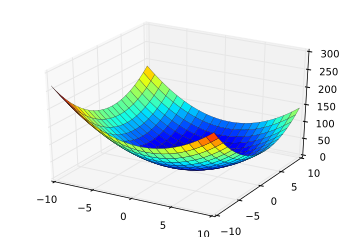

In [3]:
#graphically verify the minimum
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats=['svg']
%matplotlib inline

x = np.arange(-10,10,.1)
y = np.arange(-10,10,.1)
(x, y) = np.meshgrid(x, y)
z = (1 - x)**2 + (2 - y)**2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, label='parametric curve', cmap=cm.jet, linewidth=0.2)
#ax.legend()
plt.show()


Quite sensibly the expansion and contraction coefficients, $\gamma$ and $\beta$, should be larger than one and between zero and one respectively. If values outside of this range are used, for instance by using a $\beta$ value greater than one, and the search will march to the extrema and return large function values, depending on the initial guess of the design vector $x_0$. The paramater $\epsilon$ mostly determines the precision of the final result, that is the number of decimals away from the absolute optima point.

### Problem 2
Consider the constrained optimization problem

$$\mbox{Design variable} \, x = \left\{ \begin{array}{ll}
         x & \mbox{if $x \geq 0$};\\
        -x & \mbox{if $x < 0$}\end{array} \right. $$

$$ \mbox{min } f(x) = (x_1 - 3)^3 + (x_2 -3)^2$$

$$ \mbox{Subject to }$$ $$\begin{array}{ll} x_1  &\leq 2 \\
                                        x_1x_2 &= 8 \end{array}$$
                                        
Nased on an exterior penalty function method, employing $r_p = 5$ transform the problem into an unconstrained one by creating an unconstrained pseudo-objective function $\Phi$. If a steepest descent method is used to minimize $\Phi$ starting from the point $x = [3, 5]^T$ determine the search direction $d$ that should be used

Using an exterior penalty function our constraints should have the form

$$r_p(max(0, g_1)^2 + |g_2|^2).$$

Therefore the pseudo-objective funtion will have the form

$$\Phi = (x_1 - 3)^3 + (x_2 -3)^2 + r_p(max(0, x_1 - 2)^2 + (|x_1 x_2|- 2)^2).$$

Taking the gradient of the objective pseudo-function we have

$$\frac{\partial \Phi}{\partial x_1}  = \frac{\partial f}{\partial x_1} + r_p(2 g_1 \frac{\partial g_1}{\partial x_1} + 2g_2 \frac{\partial g_2}{\partial x_1})$$

$$\frac{\partial \Phi}{\partial x_2} = \frac{\partial f}{\partial x_2} + r_p(2 g_1 \frac{\partial g_1}{\partial x_2} + 2g_2 \frac{\partial g_2}{\partial x_2}),$$

where

$$\begin{array} \frac{\partial f}{\partial x_1} &=& 3(x_1 - 3)^2 \\
                \frac{\partial g_1}{\partial x_1} &=& 1\\
                \frac{\partial g_2}{\partial x_1} &=& |x_1x_2 - 8|x_2 \\
                \frac{\partial f}{\partial x_2} &=& 2(x_2 -3) \\
                \frac{\partial g_1}{\partial x_2} &=& 0 \\                                 \frac{\partial g_2}{\partial x_2} &=& |x_1x_2 -8|x_1 \end{array}.$$
                
Substituting up we have

$$\begin{array}\frac{\partial \Phi}{\partial x_1} &=& 3(x_1 - 3)^2 =r_p(2 \mbox{max}(0, x_1-2) + 2|x_1x_2 -8|) \\
\frac{\partial \Phi}{\partial x_2} &=& 2(x_2 -3) +r_p(2|x_1x_2 - 8|x_2)\end{array}$$

The direction of steepest descent, $d$, is $- \nabla \Phi = \langle \frac{\partial \Phi}{\partial x_1}, \frac{\partial \Phi}{\partial x_2} \rangle$. At $x = [3,5]^T$ we can evaluate the direction of steepests decent as

$$\left. \frac{\partial \Phi}{\partial x_1}\right|_{x=(3,5)} = 5(2(1) + 2(7)(6)) = 360$$

$$\left. \frac{\partial \Phi}{\partial x_2}\right|_{x=(3,5)} = 2(2) + 5(2(7)(3)) = 218$$

Normalizing by the gradient so that we have a unit vector, $d$, in the direction of steepest descent

$$\frac{\langle 360, 218 \rangle}{\sqrt{360^2 + 218^2}} = \langle 0.855, 0.518 \rangle .$$

The next design point, assuming that a single variable search has been performed to optimize the step size (yeilding $\alpha = 0.002$), we will have

$$x^{(i+1)} = x^{(i)} + \alpha_i d$$
$$x^{(i+1)} = x^{(i)} - \alpha_i \nabla \Phi$$

$$\begin{array} x^{(i+1)} &=& (3,5) - 0.002 \langle 0.855, 0.518 \rangle \\
                         &=& (2.998, 4.99) \end{array}$$